# Topic modeling:

Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for

# Latent Dirichlet Allocation:

It is one of the most popular topic modeling methods. Each document is made up of various words, and each topic also has various words belonging to it. The aim of LDA is to find topics a document belongs to, based on the words in it.

# Assumptions:

1. Each document is just a collection of words or a “bag of words”. Thus, the order of the words and the grammatical role of the words (subject, object, verbs, …) are not considered in the model.

2. Words like am/is/are/of/a/the/but/… don’t carry any information about the “topics” and therefore can be eliminated from the documents as a preprocessing step

3. We know beforehand how many topics we want. ‘k’ is pre-decided.

4. All topic assignments except for the current word in question are correct, and then updating the assignment of the current word using our model of how documents are generated

# Formula

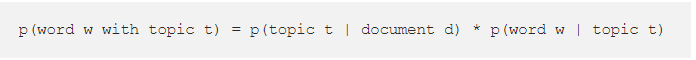

# Explanation:

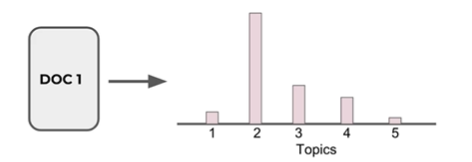

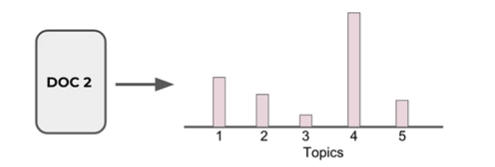

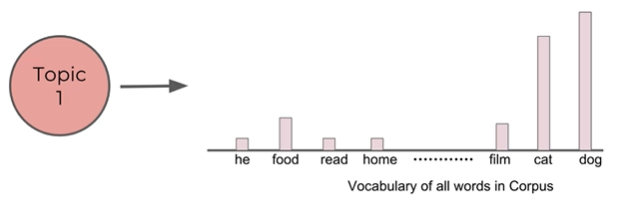

## Implementation:

In [2]:
import pandas as pd
npr = pd.read_csv('npr.csv')
npr.head(15)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
5,I did not want to join yoga class. I hated tho...
6,With a who has publicly supported the debunk...
7,"I was standing by the airport exit, debating w..."
8,"If movies were trying to be more realistic, pe..."
9,"Eighteen years ago, on New Year’s Eve, David F..."


## Preprocessing:

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [54]:
dtm = cv.fit_transform(npr['Article'])
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

# Latent Dirichlet Allocation:

In [55]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

### Showing Top Words Per Topic

In [56]:
len(LDA.components_)

7

In [57]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [58]:
len(LDA.components_[0])

54777

In [59]:
single_topic = LDA.components_[0]

In [60]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993], dtype=int64)

In [61]:
# Word least representative of this topic
single_topic[18302]

0.14285714309286987

In [62]:
# Word most representative of this topic
single_topic[42993]

6247.245510521086

In [63]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993], dtype=int64)

In [64]:
top_word_indices = single_topic.argsort()[-10:]

In [65]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

new
percent
government
company
million
care
people
health
said
says


These look like business articles perhaps... Let's confirm by using .transform() on our vectorized articles to attach a label number. But first, let's view all the 10 topics found.

In [66]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

### Attaching Discovered Topic Labels to Original Articles

In [67]:
topic_results = LDA.transform(dtm)

In [68]:
topic_results.shape

(11992, 7)

In [69]:
topic_results[0]

array([1.61040465e-02, 6.83341493e-01, 2.25376318e-04, 2.25369288e-04,
       2.99652737e-01, 2.25479379e-04, 2.25497980e-04])

In [70]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [71]:
topic_results[0].argmax()

1

This means that our model thinks that the first article belongs to topic #1.

### Combining with Original Data

In [72]:
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [73]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0], dtype=int64)

In [74]:
npr['Topic'] = topic_results.argmax(axis=1)

In [75]:
npr.head(50)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
5,I did not want to join yoga class. I hated tho...,3
6,With a who has publicly supported the debunk...,3
7,"I was standing by the airport exit, debating w...",2
8,"If movies were trying to be more realistic, pe...",3
9,"Eighteen years ago, on New Year’s Eve, David F...",2
